## Data Cleaning

### Housekeeping

In [1]:
# Import the required third-party libraries
import numpy as np
import pandas as pd
import missingno as msn

In [2]:
# Show all the columns in data frame
pd.set_option("display.max_columns", 120)

### Load the data to a pandas data frame

The raw data can be found in data/raw-data.csv  
There are a total of 2919 observations and 80 features with 50-50 train-test split

A detailed description of the data types for each column can be found in data/data-dictionary.txt

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
df_train.shape

(1460, 81)

In [118]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [119]:
df_test.shape

(1459, 80)

### Continuous and Discrete Predictors

For the ease of visualization and analysis the features are split into continuous and discrete variables  
- **continuous** -> columns with more than 15 unique observations (excluding GarageYrBlt,Neighborhood, YearBuilt, YearRemodAdd)
- **discrete**   -> all other columns with less than 15 distinct values

In [82]:
TARGET_VARIABLE = ['SalePrice']
INDEX_VARIABLE = ['Id']
CONTINUOUS_VARIABLES = []
DISCRETE_VARIABLES = []

COLUMNS = df_train.columns.difference(['Id', 'SalePrice'])
for column in COLUMNS:
    mask = df_train[column].notnull()
    num_unique_values = len(list(x for x in df_train.loc[mask, column].unique()))
    if num_unique_values > 16 and column not in ('GarageYrBlt','Neighborhood', 'YearBuilt', 'YearRemodAdd'):
        CONTINUOUS_VARIABLES.append(column)
    else:
        DISCRETE_VARIABLES.append(column)

In [83]:
df_train[CONTINUOUS_VARIABLES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   3SsnPorch      1460 non-null   int64  
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   EnclosedPorch  1460 non-null   int64  
 7   GarageArea     1460 non-null   int64  
 8   GrLivArea      1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  LotFrontage    1201 non-null   float64
 11  LowQualFinSF   1460 non-null   int64  
 12  MasVnrArea     1452 non-null   float64
 13  MiscVal        1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  ScreenPorch    1460 non-null   int64  
 16  TotalBsmtSF    1460 non-null   int64  
 17  WoodDeckSF     1460 non-null   int64  
dtypes: float

In [84]:
df_train[DISCRETE_VARIABLES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley          91 non-null     object 
 1   BedroomAbvGr   1460 non-null   int64  
 2   BldgType       1460 non-null   object 
 3   BsmtCond       1423 non-null   object 
 4   BsmtExposure   1422 non-null   object 
 5   BsmtFinType1   1423 non-null   object 
 6   BsmtFinType2   1422 non-null   object 
 7   BsmtFullBath   1460 non-null   int64  
 8   BsmtHalfBath   1460 non-null   int64  
 9   BsmtQual       1423 non-null   object 
 10  CentralAir     1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  Electrical     1459 non-null   object 
 14  ExterCond      1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  Fence   

### Missingness

**Note 1:** LotFrontage, FireplaceQu have more than 15% missing data  
**Note 2:** MiscFeature, Fence, PoolQC and Alley have more than 50% data missing
**Note 3:** BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageCond,GarageFinish,GarageQual,GarageType,
            GarageYrBlt have missingness ranging from about 1-12%

<AxesSubplot:>

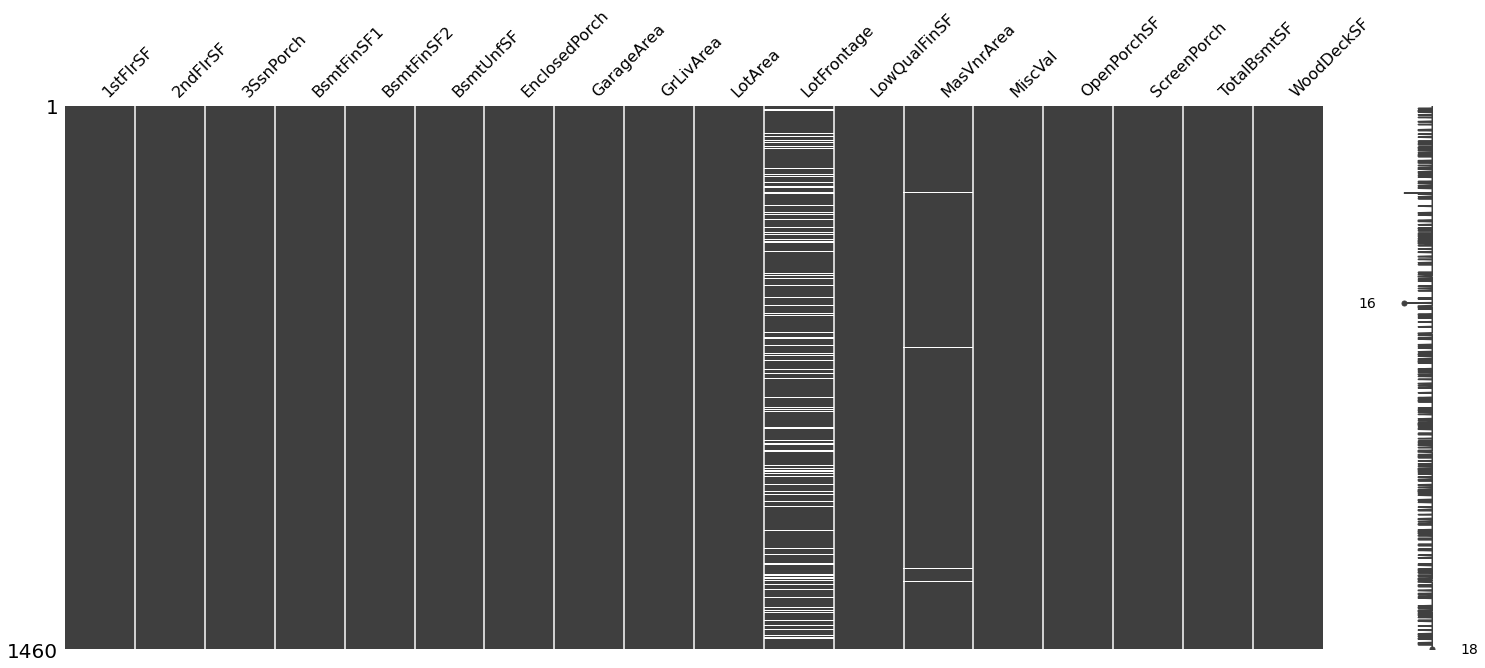

In [85]:
msn.matrix(df_train[CONTINUOUS_VARIABLES])

<AxesSubplot:>

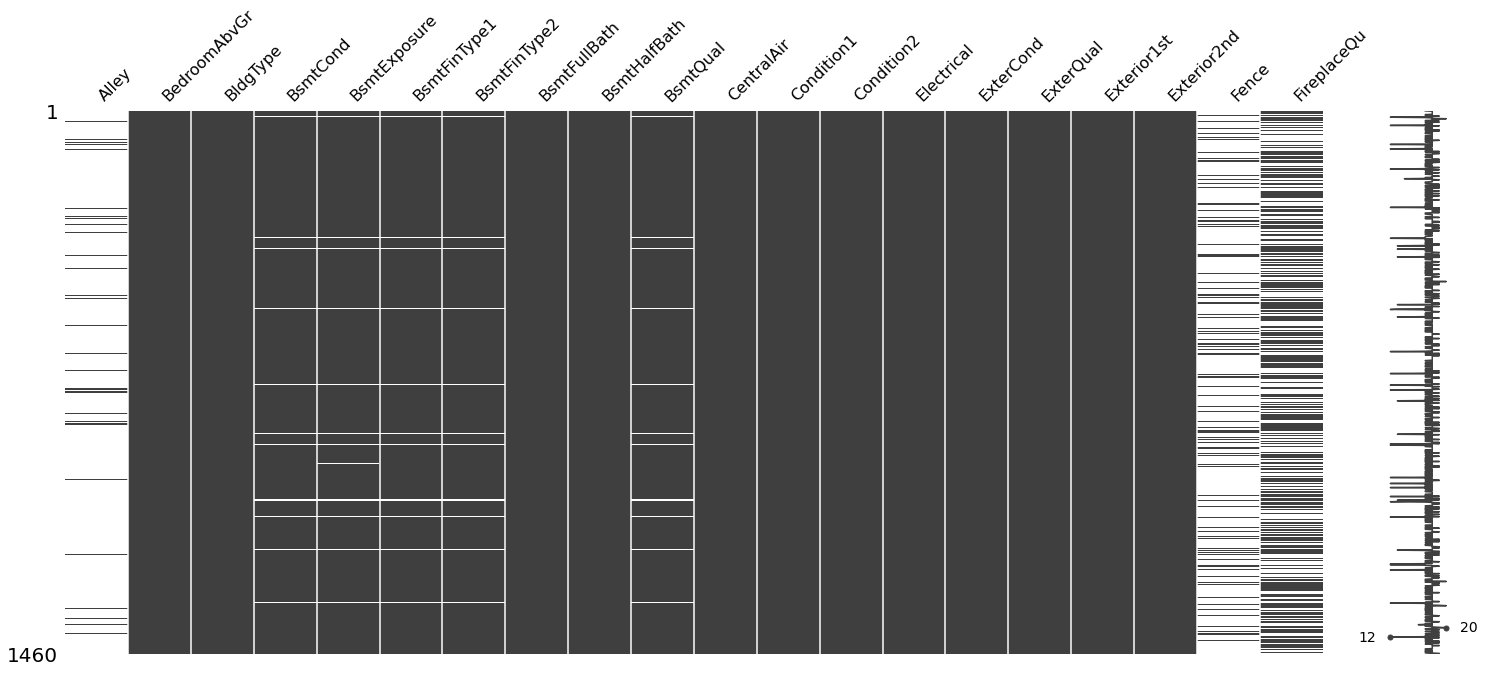

In [86]:
msn.matrix(df_train[DISCRETE_VARIABLES[:20]])

<AxesSubplot:>

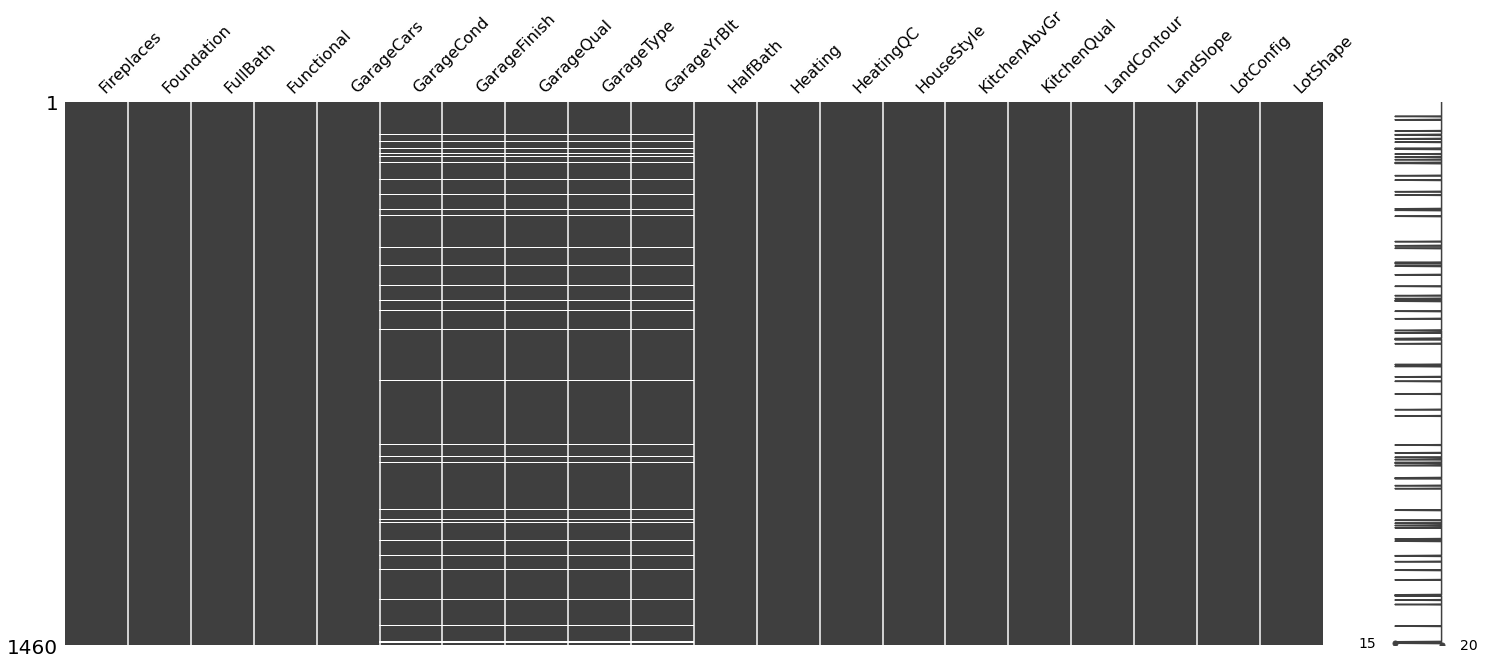

In [87]:
msn.matrix(df_train[DISCRETE_VARIABLES[20:40]])

<AxesSubplot:>

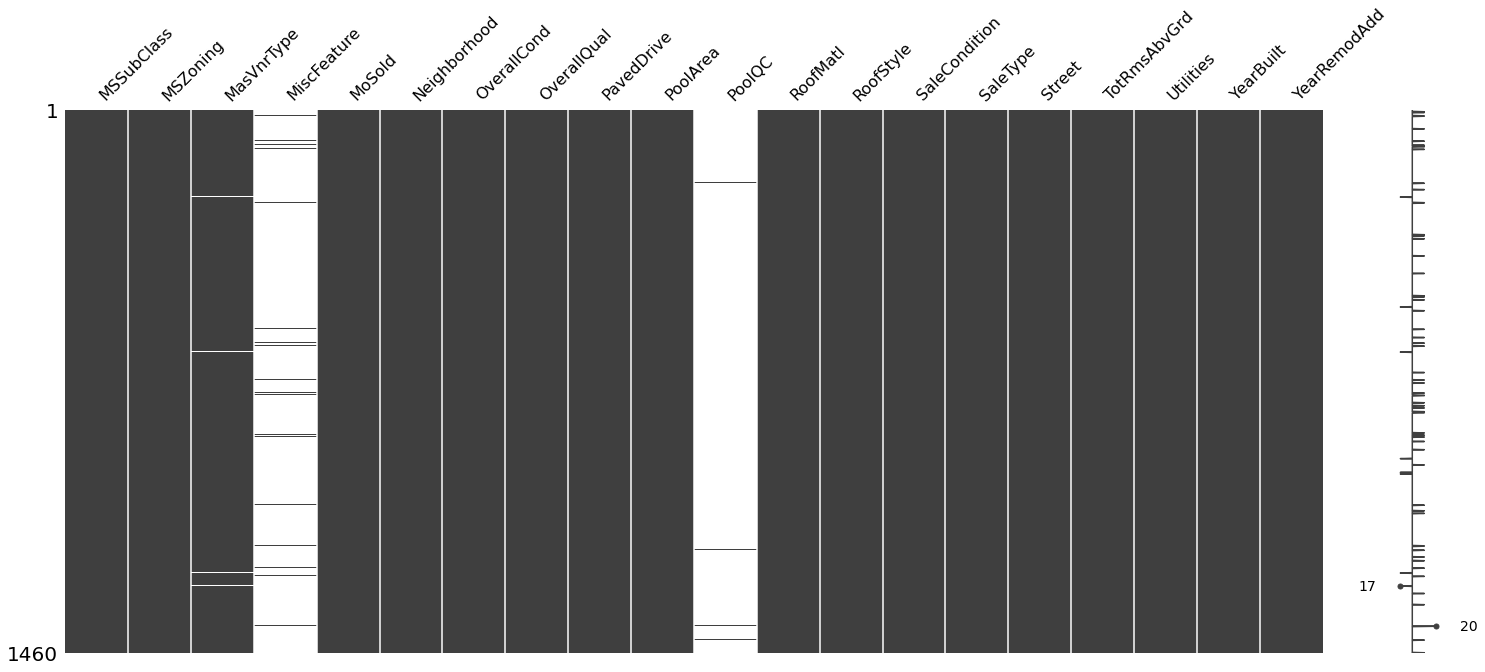

In [88]:
msn.matrix(df_train[DISCRETE_VARIABLES[40:60]])

### Cleaning

We will drop the following columns to not have to deal with interpolating meaningful replacements for the missing values :

- **LotFrontage**: Other variables like LotArea possibly have a greater impact on the price
- **MiscFeature**: These additional features like Tennis Court, Elevator, etc. are present in only a small number of
                   houses, possibly ones at the higher end of the price spectrum
- **MiscVal**    : Since MiscFeature is dropped     
- **Alley**      : Too little data available to determine the impact on prices
- **Fence**      : Although this can have some impact depending on the neighborhood, but we have too many missing
                   values to interpolate meaningful replacements
- **FireplaceQu**: Having a fire place is probably more important in appraising a house price than the quality of the
                   fireplace itself which is possibly captured by the overall house quality
- **GarageYrBlt**: Assumed as not important for the house pricing
- **PoolQC**     : Again, having a pool is assumed to be more important than the quality of the pool

For the below columns, missing data actually indicates feature not being available or not applicable for the house. We therefore, replace missing value with the string 'NA'
- **GarageFinish**
- **GarageCond**
- **GarageQual**
- **GarageType**
- **BsmtCond**
- **BsmtExposure**
- **BsmtFinType1**
- **BsmtFinType2**
- **BsmtQual**

For **MasVnrArea** and **MasVnrType** we use linear interpolation to fill the missing data

In [89]:
columns_excluded = ['LotFrontage','MiscVal','Alley','Fence','FireplaceQu','GarageYrBlt','MiscFeature','PoolQC']

In [90]:
df_train['GarageFinish'] = df_train['GarageFinish'].replace(np.nan, 'NA')
df_train['GarageCond'] = df_train['GarageCond'].replace(np.nan, 'NA')
df_train['GarageQual'] = df_train['GarageQual'].replace(np.nan, 'NA')
df_train['GarageType'] = df_train['GarageType'].replace(np.nan, 'NA')

In [91]:
df_train['BsmtCond'] = df_train['BsmtCond'].replace(np.nan, 'NA')
df_train['BsmtExposure'] = df_train['BsmtExposure'].replace(np.nan, 'NA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].replace(np.nan, 'NA')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace(np.nan, 'NA')
df_train['BsmtQual'] = df_train['BsmtQual'].replace(np.nan, 'NA')

In [92]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].interpolate().astype('int')

In [93]:
df_train.MasVnrType = df_train.MasVnrType.astype('category')
df_train['MasVnrType'] = df_train.MasVnrType.cat.codes.replace(-1, np.nan).interpolate().astype(int).astype('category').cat.rename_categories(df_train.MasVnrType.cat.categories)

In [94]:
df_train.drop(columns_excluded, axis=1, inplace = True)

In [95]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',

### Cleaned Data

We are left with 1460 observations and 73 features

In [96]:
df_train.shape

(1460, 73)

In [97]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [98]:
df_train.to_csv('data/{}-clean.csv'.format(filename), index=False)

In [99]:
CONTINUOUS_VARIABLES = [x for x in CONTINUOUS_VARIABLES if x not in columns_excluded]
DISCRETE_VARIABLES = [x for x in DISCRETE_VARIABLES if x not in columns_excluded]

In [100]:
# Global variables
%store CONTINUOUS_VARIABLES
%store DISCRETE_VARIABLES
%store TARGET_VARIABLE
%store filename

Stored 'CONTINUOUS_VARIABLES' (list)
Stored 'DISCRETE_VARIABLES' (list)
Stored 'TARGET_VARIABLE' (list)
Stored 'filename' (str)
